In [1]:
library("ggplot2")
options(repr.plot.width=4, repr.plot.height=4) # Size of the plots

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


This lab we will work with the results of the 2012 and 2016 US elections (Alaska is missing)

In [2]:
us.df <- read.csv("us_elections.csv")
str(us.df)

'data.frame':	3111 obs. of  17 variables:
 $ state            : Factor w/ 50 levels "Alabama","Arizona",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ county           : Factor w/ 1808 levels "Abbeville","Acadia",..: 79 86 97 145 160 218 228 239 286 308 ...
 $ trump            : int  18172 72883 5454 6738 22859 1140 4901 32865 7843 8953 ...
 $ clinton          : int  5936 18458 4871 1874 2156 3530 3726 13242 5784 1547 ...
 $ romney           : int  17379 66016 5550 6132 20757 1251 5087 30278 7626 7506 ...
 $ obama            : int  6363 18424 5912 2202 2970 4061 4374 15511 6871 2132 ...
 $ voting_population: int  40690 151770 20375 17590 42430 8195 15425 88525 26480 20505 ...
 $ white_pct        : num  75.7 83.2 45.9 74.8 87.7 ...
 $ black_pct        : num  18.37 9.23 47.89 21.21 1.56 ...
 $ hispanic_pct     : num  2.57 4.37 4.31 2.22 8.73 ...
 $ foreignborn_pct  : num  1.84 3.27 2.86 1.35 4.27 ...
 $ female_pct       : num  51.2 51.2 46.5 46.5 50.5 ...
 $ age29andunder_pct: num  40 35.5 37.7 37.3 37.

## Activity 1: How many more people voted for Clinton than for Trump?

In [3]:
sum(us.df$clinton) - sum(us.df$trump)

[1] 2833800

## Activity 2: Create a new column "trump_pct" that has the percentage of voters in each county that voted for Trump. Do the same for Clinton, Romney and Obama

In [4]:
us.df$trump_pct <- us.df$trump / us.df$voting_population
us.df$clinton_pct <- us.df$clinton / us.df$voting_population
us.df$obama_pct <- us.df$obama / us.df$voting_population
us.df$romney_pct <- us.df$romney / us.df$voting_population

# <font color='#FD7C6E'> Correlation </font>

In [5]:
cor.test(us.df$trump_pct, us.df$white_pct)


	Pearson's product-moment correlation

data:  us.df$trump_pct and us.df$white_pct
t = 42.983, df = 3109, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5880055 0.6321117
sample estimates:
      cor 
0.6105318 


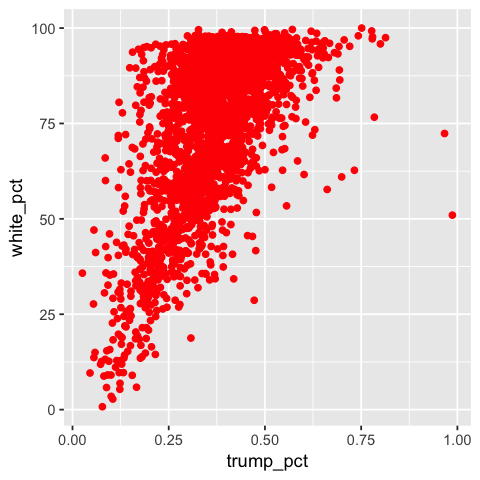

In [6]:
ggplot(data=us.df, aes(trump_pct, white_pct)) + geom_point(color="red")

In [7]:
cor.test(us.df$trump_pct, us.df$female_pct)


	Pearson's product-moment correlation

data:  us.df$trump_pct and us.df$female_pct
t = -0.69616, df = 3109, p-value = 0.4864
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04760564  0.02266778
sample estimates:
        cor 
-0.01248434 


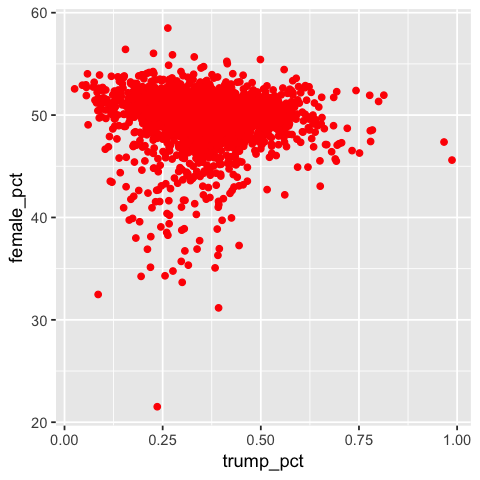

In [8]:
ggplot(data=us.df, aes(trump_pct, female_pct)) + geom_point(color="red")

In [9]:
cor.test(us.df$trump_pct, us.df$hispanic_pct)


	Pearson's product-moment correlation

data:  us.df$trump_pct and us.df$hispanic_pct
t = -15.486, df = 3109, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2999279 -0.2346710
sample estimates:
       cor 
-0.2676063 


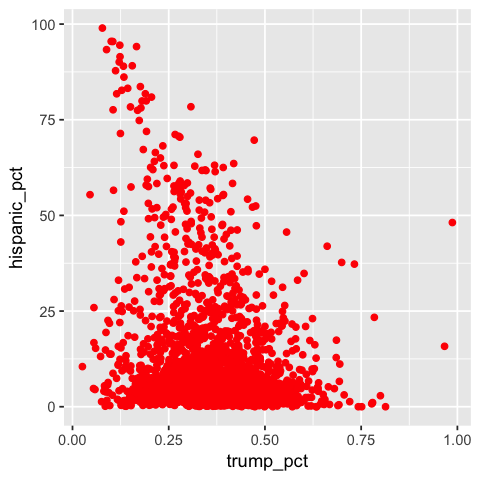

In [10]:
ggplot(data=us.df, aes(trump_pct, hispanic_pct, )) + geom_point(color="red") 

## Activity 3: Find other interesting correlations from Trump and the other candidates

## Activity 4: Is there a correlation between Trump and percentage of women when we just consider Texas?

In [11]:
cor.test(us.df[us.df$state=="Texas", ]$trump_pct, us.df[us.df$state=="Texas", ]$female_pct)


	Pearson's product-moment correlation

data:  us.df[us.df$state == "Texas", ]$trump_pct and us.df[us.df$state == "Texas", ]$female_pct
t = 2.003, df = 252, p-value = 0.04625
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.002134337 0.244503131
sample estimates:
     cor 
0.125186 


# <font color='#FD7C6E'> Partial Correlation </font>

In [12]:
cor.test(us.df$trump, us.df$median_income)


	Pearson's product-moment correlation

data:  us.df$trump and us.df$median_income
t = 19.888, df = 3109, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3044061 0.3667665
sample estimates:
      cor 
0.3359544 


In [13]:
us.df$morecollege_pct <- 1 - us.df$lesscollege_pct
cor.test(us.df$trump, us.df$morecollege_pct)


	Pearson's product-moment correlation

data:  us.df$trump and us.df$morecollege_pct
t = 24.129, df = 3109, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3671372 0.4263470
sample estimates:
      cor 
0.3971553 


Income and percentage of population with college degree are highly related:

In [14]:
cor.test(us.df$median_income, us.df$morecollege_pct)


	Pearson's product-moment correlation

data:  us.df$median_income and us.df$morecollege_pct
t = 53.259, df = 3109, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6718819 0.7086561
sample estimates:
      cor 
0.6907153 


To run partial correlations in R we need the library "ppcor" which is not preinstalled. Install it:

1. In the Anaconda Navigator, go to Environments and click in your R environment. 
2. In the upper middle there is a menu "installed" change to "uninstall"
3. In the search bar look for r-ppcor
4. Click on the square box beside it and afterwards click "Apply"
5. Open your notebook as usual


In [15]:
library("ppcor")
pcor.test(us.df$trump, us.df$morecollege_pct, us.df$median_income)

Loading required package: MASS


estimate,p.value,statistic,n,gp,Method
0.2424124,7.881194e-43,13.92983,3111,1,pearson


In [16]:
pcor.test(us.df$trump, us.df$median_income, us.df$morecollege_pct)

estimate,p.value,statistic,n,gp,Method
0.09286991,2.122861e-07,5.199918,3111,1,pearson


Something interesting happened here! Trump and University correlation dropped from 0.39 to 0.24 when we take into consideration the income as a confounding variable. Some drop, but not that big. However the correlation between Trump and Income dropped from 0.33 to 0.09. A lot! This means that most of the correlation between Trump and Income is actually explained by University degree. If we wanted to make predictions, University has most of the correlation explained.

# <font color='#FD7C6E'> Checking for Normality </font>

Lets go away from politics and back to our nice Pokemon world...

## Is the attack of the pokemons normal distributed?

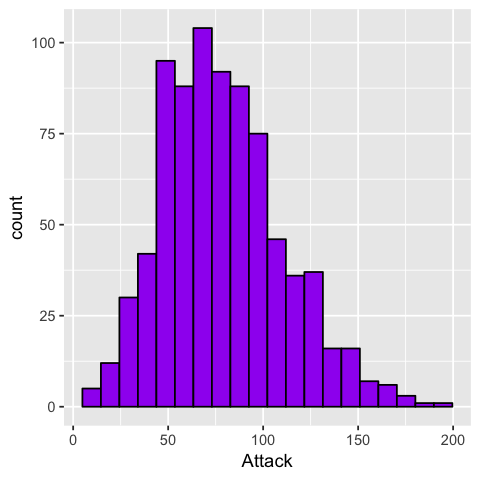

In [17]:
pokemon.df <- read.csv("pokemon.csv")
ggplot(data=pokemon.df, aes(Attack)) + geom_histogram(bins=20, color="black", fill="purple") 

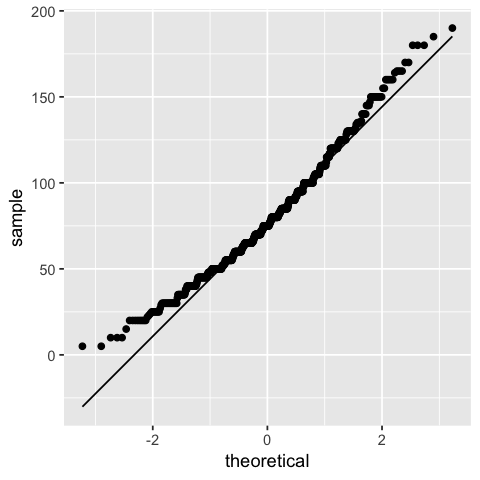

In [18]:
ggplot(pokemon.df, aes(sample = Attack)) + stat_qq() + stat_qq_line()

In [19]:
shapiro.test(pokemon.df$Attack)


	Shapiro-Wilk normality test

data:  pokemon.df$Attack
W = 0.97893, p-value = 2.472e-09


We **reject** the null that the attack of the pokemons is normal distributed

## Activity 5: Is the attack of water Pokemon normal distributed?

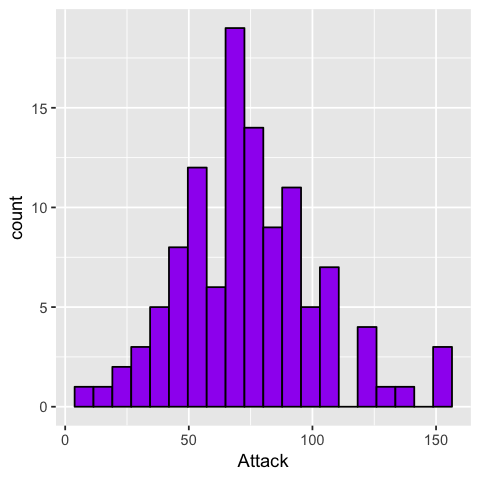

In [20]:
ggplot(data=pokemon.df[pokemon.df$Type.1=="Water", ], aes(Attack)) + geom_histogram(bins=20, color="black", fill="purple") 

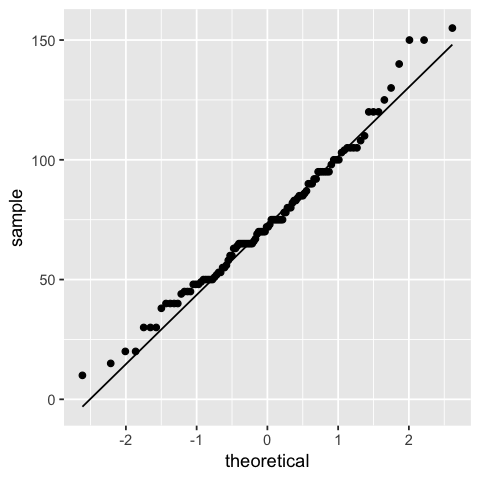

In [21]:
ggplot(pokemon.df[pokemon.df$Type.1=="Water", ], aes(sample = Attack)) + stat_qq() + stat_qq_line()

In [22]:
shapiro.test(pokemon.df[pokemon.df$Type.1=="Water", ]$Attack)


	Shapiro-Wilk normality test

data:  pokemon.df[pokemon.df$Type.1 == "Water", ]$Attack
W = 0.98105, p-value = 0.1129


# <font color='#FD7C6E'> Transforming the Data </font>

In [23]:
pokemon.df$sqAttack <- sqrt(pokemon.df$Attack)
head(pokemon.df)

Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,sqAttack
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,7.000000
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7.874008
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,9.055385
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,10.000000
Charmander,Fire,,309,39,52,43,60,50,65,1,False,7.211103
Charmeleon,Fire,,405,58,64,58,80,65,80,1,False,8.000000


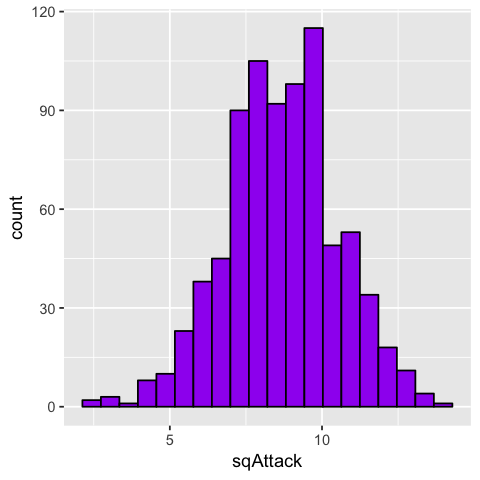

In [24]:
ggplot(data=pokemon.df, aes(sqAttack)) + geom_histogram(bins=20, color="black", fill="purple") 

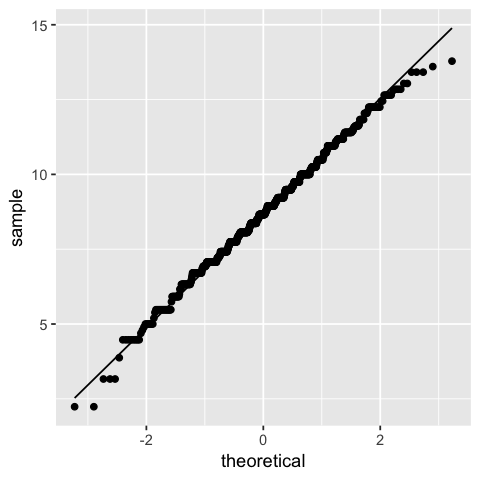

In [25]:
ggplot(pokemon.df, aes(sample = sqAttack)) + stat_qq() + stat_qq_line()

In [26]:
shapiro.test(pokemon.df$sqAttack)


	Shapiro-Wilk normality test

data:  pokemon.df$sqAttack
W = 0.99653, p-value = 0.07752


Now we can't reject the null anymore that the data is normally distributed on a 0.05 confidence level

**Wait a minute...** we did not check for normality before doing all the correlation tests before...

BAD!

In [27]:
shapiro.test(us.df$trump)


	Shapiro-Wilk normality test

data:  us.df$trump
W = 0.41668, p-value < 2.2e-16


In [28]:
shapiro.test(us.df$hispanic_pct)


	Shapiro-Wilk normality test

data:  us.df$hispanic_pct
W = 0.59723, p-value < 2.2e-16


We need the Spearman correlation! How to implement it?

In [29]:
cor.test(us.df$trump_pct, us.df$hispanic_pct, method="spearman")

Warning message in cor.test.default(us.df$trump_pct, us.df$hispanic_pct, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  us.df$trump_pct and us.df$hispanic_pct
S = 6213667247, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2382241 


Don't worry about the warning, now go back and change all your correlation tests from before!